# Assignment for AI4PH - Developing and Deploying Transparent and Reproducible Algorithms for Public Health

## Introduction

This assignment demonstrates the whole workflow for building and evaluating a simple classification model using `tidymodels`, and implementing it using `plumber`. The `stroke` model used in this workflow was trained and evaluated using a harmonized `valid_data.rds` dataset provided in class.

### Load necessary packages

In [40]:
# data manipulation and building and validating models
library(tidyverse)

# models building and evaluation
library(tidymodels)

# model implementation
library(plumber)


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.4.4     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
-- Attaching packages -------------------------------------- tidymodels 1.1.1 --

v broom        1.0.5     v rsample      1.2.0
v dials        1.2.0     v tune         1.1.2
v infer        1.0.6     v workflows    1.1.3
v modeldata    1.3.0     v workflowsets 1.0.1
v parsnip      1.2.0     v yardstick    1.3.0
v recipes      1.0.9     

-- Conflicts ----------------------------------------- tidymodels_conflicts() --
x scales::discard()  masks purrr::discard()
x dplyr::fil

### Load and prepare the data

In [41]:
# load the data
valid_data <- readRDS("valid_data.rds")

In [25]:
# show sample size and number of predictors
dim(valid_data)

[1] 4067   11

In [26]:
# show the first 6 rows
head(valid_data) 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>
4,f,53.16061,0,0,1,Self-employed,Rural,96.51475,40.10887,never smoked,0
7,m,71.43607,1,0,1,Self-employed,Urban,72.80908,33.61018,formerly smoked,0
9,m,57.92308,0,0,1,Private,Urban,99.58223,28.18821,never smoked,0
10,f,73.22721,0,0,1,Private,Urban,239.64668,43.08807,never smoked,0
14,f,48.62032,0,0,1,Self-employed,Urban,87.17612,25.84330,never smoked,0
15,f,61.45526,0,0,1,Self-employed,Urban,79.22105,29.64971,smokes,0


In [27]:
# show some information about the dataset
str(valid_data)

'data.frame':	4067 obs. of  11 variables:
 $ gender           : Factor w/ 2 levels "f","m": 1 2 2 1 1 1 1 2 1 1 ...
 $ age              : num  53.2 71.4 57.9 73.2 48.6 ...
 $ hypertension     : Factor w/ 2 levels "0","1": 1 2 1 1 1 1 1 1 1 1 ...
 $ heart_disease    : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ ever_married     : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ work_type        : Factor w/ 3 levels "Govt_job","Private",..: 3 3 2 2 3 3 2 2 3 2 ...
 $ Residence_type   : Factor w/ 2 levels "Rural","Urban": 1 2 2 2 2 2 2 1 1 2 ...
 $ avg_glucose_level: num  96.5 72.8 99.6 239.6 87.2 ...
 $ bmi              : num  40.1 33.6 28.2 43.1 25.8 ...
 $ smoking_status   : Factor w/ 3 levels "formerly smoked",..: 2 1 2 2 2 3 3 2 2 2 ...
 $ stroke           : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...


In [28]:
# show the summary information about the dataset
summary(valid_data)

 gender        age        hypertension heart_disease ever_married
 f:2376   Min.   :40.02   0:3064       0:3424        0: 399      
 m:1691   1st Qu.:54.25   1:1003       1: 643        1:3668      
          Median :65.57                                          
          Mean   :64.73                                          
          3rd Qu.:75.61                                          
          Max.   :94.06                                          
         work_type    Residence_type avg_glucose_level      bmi       
 Govt_job     : 598   Rural:1964     Min.   :  4.739   Min.   :10.23  
 Private      :2349   Urban:2103     1st Qu.: 79.203   1st Qu.:25.32  
 Self-employed:1120                  Median :106.274   Median :29.45  
                                     Mean   :126.685   Mean   :30.27  
                                     3rd Qu.:180.149   3rd Qu.:34.15  
                                     Max.   :309.123   Max.   :65.03  
         smoking_status stroke  
 formerl

### Test the saved model on the validation data

In [42]:
# read in the saved workflow object
workflow <- readRDS("stroke_lr_workflow.rds")

In [30]:
# predict on the validation data
prediction_class <- workflow %>% 
  predict(new_data = valid_data,
          type = 'class')

Warning message:
"Novel levels found in column 'gender': 'f', 'm'. The levels have been removed, and values have been coerced to 'NA'."
Warning message:
"Novel levels found in column 'hypertension': '0', '1'. The levels have been removed, and values have been coerced to 'NA'."
Warning message:
"Novel levels found in column 'heart_disease': '0', '1'. The levels have been removed, and values have been coerced to 'NA'."
Warning message:
"Novel levels found in column 'ever_married': '0', '1'. The levels have been removed, and values have been coerced to 'NA'."
Warning message:
"! There are new levels in a factor: NA"
Warning message:
"! There are new levels in a factor: NA"
Warning message:
"! There are new levels in a factor: NA"
Warning message:
"! There are new levels in a factor: NA"
Warning message:
"! There are new levels in a factor: Self-employed, Private, and Govt_job"
Warning message:
"! There are new levels in a factor: never smoked, formerly smoked, and smokes"


Seems we've run into some issues. The issue at hand stems from the workflow object's inability to recognize various levels within the `valid_data` dataset, resulting in cooercing row values to `NAs`.<br>
<br>
Comparing the dictionary of the training data (`train_data_variables.csv`) with the summary info of the validation data, we see that the `gender`, `hypertension`, `heart_disease` and `ever_married` columns have different values from what the model expects. <br>
<br>
 To resolve this, we should initially duplicate the dataset to preserve the original data. Following this, we'll employ the `mutate` function from the `dplyr` package to directly modify and rename the values within this copied dataset. Here's how to proceed:

1. **Duplicate the Dataset**: Create a copy of the `valid_data` dataset to ensure that the original data remains unaffected by the modifications we're about to make.

2. **Update Values Using `mutate`**: With the copied dataset, utilize `dplyr`'s `mutate` function to rename or update the values in-place, addressing the issue of unrecognized levels.

<br>
<br>

Additionally, to help with clarity with inputting data from the frontend, the `work_type` and `smoking_status` columns would be updated as well.



### Harmonize the data

In [45]:
# make a copy of the valid data
harmonized_valid_data <- valid_data


In [46]:
# Renaming the values
harmonized_valid_data <- harmonized_valid_data %>%
  mutate(work_type = case_when(
    work_type == "Self-employed" ~ "Self Employed",
    work_type == "Private" ~ "Private Sector Employee",
    work_type == "Govt_job" ~ "Public Sector Employee",
    TRUE ~ work_type # Default case to leave any other values unchanged
  ))
harmonized_valid_data <- harmonized_valid_data %>%
  mutate(smoking_status = case_when(
    smoking_status == "never smoked" ~ "Never Smoked",
    smoking_status == "formerly smoked" ~ "Former Smoker",
    smoking_status == "smokes" ~ "Current Smoker",
    TRUE ~ smoking_status 
  ))
harmonized_valid_data <- harmonized_valid_data %>%
  mutate(gender = case_when(
    gender == "f" ~ "F",
    gender == "m" ~ "M",
    TRUE ~ gender 
  ))

harmonized_valid_data <- harmonized_valid_data %>%
  mutate(hypertension = factor(hypertension, levels = c("0", "1"), labels = c("No", "Yes")))

harmonized_valid_data <- harmonized_valid_data %>%
  mutate(ever_married = factor(ever_married, levels = c("0", "1"), labels = c("No", "Yes")))

harmonized_valid_data <- harmonized_valid_data %>%
  mutate(heart_disease = factor(heart_disease, levels = c("0", "1"), labels = c("No", "Yes")))


In [47]:
# check and make sure the variables are now in the correct format.
str(harmonized_valid_data)

'data.frame':	4067 obs. of  11 variables:
 $ gender           : chr  "F" "M" "M" "F" ...
 $ age              : num  53.2 71.4 57.9 73.2 48.6 ...
 $ hypertension     : Factor w/ 2 levels "No","Yes": 1 2 1 1 1 1 1 1 1 1 ...
 $ heart_disease    : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ ever_married     : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ work_type        : chr  "Self Employed" "Self Employed" "Private Sector Employee" "Private Sector Employee" ...
 $ Residence_type   : Factor w/ 2 levels "Rural","Urban": 1 2 2 2 2 2 2 1 1 2 ...
 $ avg_glucose_level: num  96.5 72.8 99.6 239.6 87.2 ...
 $ bmi              : num  40.1 33.6 28.2 43.1 25.8 ...
 $ smoking_status   : chr  "Never Smoked" "Former Smoker" "Never Smoked" "Never Smoked" ...
 $ stroke           : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...


#### Verify that the workflow works on the harmonized validation data

In [49]:
  testdata <- data.frame(gender = factor("F"), 
                        age = as.numeric("46"),
                        hypertension = factor("Yes"),
                        heart_disease = factor("Yes"),
                        ever_married = factor("Yes"), 
                        work_type = factor("Self Employed"), 
                        Residence_type = factor("Rural"), 
                        avg_glucose_level = as.numeric("300"), 
                        bmi = as.numeric("70"), 
                        smoking_status = factor("Former Smoker")
  )
  

In [51]:
prediction_class <- workflow %>% 
  predict(new_data = testdata,
          type = 'class')

head(prediction_class)

.pred_class
<fct>
1


In [37]:
prediction_prob <- workflow %>% 
  predict(new_data = harmonized_valid_data,
          type = 'prob')

head(prediction_prob)

.pred_0,.pred_1
<dbl>,<dbl>
0.6897033,0.3102967
0.2375295,0.7624705
0.5263005,0.4736995
0.2991934,0.7008066
0.6296326,0.3703674
0.5184717,0.4815283


In [38]:
# Combine test data with predictions
pred_results <- harmonized_valid_data %>% 
  bind_cols(prediction_class, prediction_prob)

head(pred_results %>% select(stroke, `.pred_class`, `.pred_0`, `.pred_1`))

,stroke,.pred_class,.pred_0,.pred_1
,<fct>,<fct>,<dbl>,<dbl>
1,0,0,0.6897033,0.3102967
2,0,1,0.2375295,0.7624705
3,0,0,0.5263005,0.4736995
4,0,1,0.2991934,0.7008066
5,0,0,0.6296326,0.3703674
6,0,0,0.5184717,0.4815283


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
sens,binary,0.5725806
spec,binary,0.8109980
roc_auc,binary,0.7602710


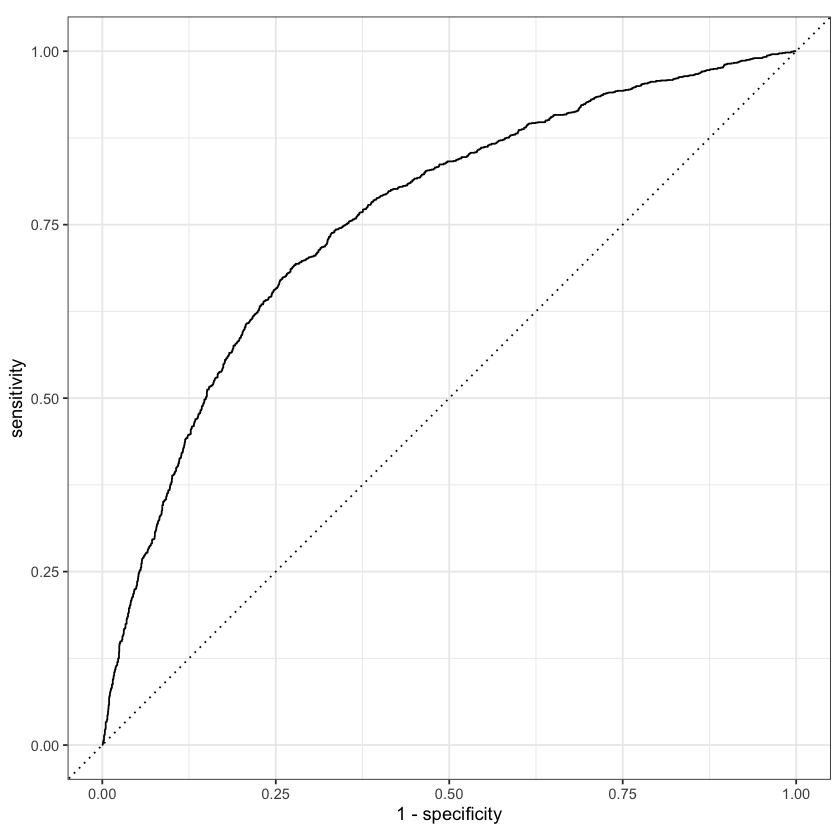

In [39]:
# model performance on the harmonized validation data set
custom_metrics <- metric_set(sens, spec, roc_auc)

custom_metrics(pred_results, truth = stroke, estimate = .pred_class, .pred_0)

pred_results %>% roc_curve(stroke, .pred_0) %>% autoplot()

In [40]:
## Save the harmonized data set

saveRDS(harmonized_valid_data, "harmonized_valid_data.rds")

In [41]:

# Register a hook to add CORS headers and handle OPTIONS requests
addCORSAndHandleOptions <- function(req, res) {
  res$setHeader('Access-Control-Allow-Origin', '*')
  res$setHeader('Access-Control-Allow-Methods', 'GET, POST, PUT, DELETE, OPTIONS')
  res$setHeader('Access-Control-Allow-Headers', 'Content-Type, Authorization')
    res$status <- 200
    # Ensure the response for OPTIONS is sent back immediately without further processing
    return(list())
}

# Create the router from plumber script
pr <- plumber::pr("plumber.R")

# Add CORS and OPTIONS handling as a global filter
pr$registerHooks(
  list(
    preroute = addCORSAndHandleOptions
  )
)

# Run the API
pr$run(port=8000)

Running plumber API at http://127.0.0.1:8000

Running swagger Docs at http://127.0.0.1:8000/__docs__/



#### Deploy Plumber API on DigitalOcean 

In [ ]:
install.packages("plumberDeploy")
install.packages("analogsea")


In [1]:
library(analogsea)


ANALOGSEA
This package requieres a DigitalOcean account.
Visit m.do.co/c/1d5a471e5f54. By using this link, you'll 
start with $100 in credits with a 2 months limit.
You can also sponsor this package at buymeacoffee.com/pacha.


Attaching package: 'analogsea'


The following object is masked from 'package:graphics':

    image




In [ ]:
account_info <- account()
print(account_info)

In [ ]:
public_key <- Sys.getenv("SSH_PUBLIC_KEY")

key_create(name = "my-key", public_key = public_key)


In [ ]:
# Validate SSH key
ssh::ssh_key_info()
lapply(analogsea::keys(), '[[', "public_key")

In [ ]:
mydrop <- plumberDeploy::do_provision()


In [7]:
analogsea::install_r_package(mydrop, "yaml")


gcc -I"/usr/share/R/include" -DNDEBUG -I. -DNDEBUG      -fpic  -g -O2 -fdebug-prefix-map=/build/r-base-DdVjkr/r-base-4.3.2=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c api.c -o api.o
gcc -I"/usr/share/R/include" -DNDEBUG -I. -DNDEBUG      -fpic  -g -O2 -fdebug-prefix-map=/build/r-base-DdVjkr/r-base-4.3.2=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c dumper.c -o dumper.o
gcc -I"/usr/share/R/include" -DNDEBUG -I. -DNDEBUG      -fpic  -g -O2 -fdebug-prefix-map=/build/r-base-DdVjkr/r-base-4.3.2=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c emitter.c -o emitter.o
gcc -I"/usr/share/R/include" -DNDEBUG -I. -DNDEBUG      -fpic  -g -O2 -fdebug-prefix-map=/build/r-base-DdVjkr/r-base-4.3.2=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c implicit.c -o implicit.o
gcc -I"/usr/share/R/include" -DNDEBUG -I

In [ ]:
analogsea::install_r_package(mydrop, "yaml")


In [11]:
analogsea::install_r_package(mydrop, "plumber")


In [34]:
analogsea::install_r_package(mydrop, "caret")


gcc -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -fdebug-prefix-map=/build/r-base-DdVjkr/r-base-4.3.2=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c apply.c -o apply.o
gcc -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -fdebug-prefix-map=/build/r-base-DdVjkr/r-base-4.3.2=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c arrayIndex.c -o arrayIndex.o
gcc -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -fdebug-prefix-map=/build/r-base-DdVjkr/r-base-4.3.2=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c distance.c -o distance.o
gcc -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -fdebug-prefix-map=/build/r-base-DdVjkr/r-base-4.3.2=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c dll.c -o dll.o
gcc -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -fdebug-prefix-map=/build/

In [12]:
analogsea::install_r_package(mydrop, "tidymodels")


gcc -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -fdebug-prefix-map=/build/r-base-DdVjkr/r-base-4.3.2=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c colorspace.c -o colorspace.o
gcc -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -fdebug-prefix-map=/build/r-base-DdVjkr/r-base-4.3.2=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c init.c -o init.o
gcc -shared -L/usr/lib/R/lib -Wl,-Bsymbolic-functions -Wl,-z,relro -o colorspace.so colorspace.o init.o -L/usr/lib/R/lib -lR
gcc 9.4.0
zlib 1.2.11 is available ok
R CMD SHLIB supports OpenMP without any extra hint
gcc -I"/usr/share/R/include" -DNDEBUG      -fopenmp  -fpic  -g -O2 -fdebug-prefix-map=/build/r-base-DdVjkr/r-base-4.3.2=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c assign.c -o assign.o
gcc -I"/usr/share/R/include" -DNDEBUG      -fopenmp  -fpic  -g -O2 -fdebug-prefix-map=/bu

In [13]:
my_droplets <- droplets()


In [16]:
droplet_id <- my_droplets[[2]]$id

print(droplet_id)


[1] 402097016


In [33]:
plumberDeploy::do_deploy_api(droplet_id, "mydrop", ".", 8000, docs = TRUE)


[100%] /Users/egbonjefri/Documents/AI4PH/AI4PH-R/1. AI4PH_example.Rmd
[100%] /Users/egbonjefri/Documents/AI4PH/AI4PH-R/2. AI4PH_assignment.Rmd
[100%] /Users/egbonjefri/Documents/AI4PH/AI4PH-R/AI4PH_assignment_JefferyOsagie.ipynb
[100%] /Users/egbonjefri/Documents/AI4PH/AI4PH-R/README.md
[100%] /Users/egbonjefri/Documents/AI4PH/AI4PH-R/Slides - R tidymodels.pdf
[100%] /Users/egbonjefri/Documents/AI4PH/AI4PH-R/harmonized_valid_data.rds
[100%] /Users/egbonjefri/Documents/AI4PH/AI4PH-R/plumber.R
[100%] /Users/egbonjefri/Documents/AI4PH/AI4PH-R/stroke_lr_workflow.rds
[100%] /Users/egbonjefri/Documents/AI4PH/AI4PH-R/test.ipynb
[100%] /Users/egbonjefri/Documents/AI4PH/AI4PH-R/train_data.rds
[100%] /Users/egbonjefri/Documents/AI4PH/AI4PH-R/train_data_variables.csv
[100%] /Users/egbonjefri/Documents/AI4PH/AI4PH-R/valid_data.rds
/tmp/FFRITGASRH
[100%] /private/var/folders/ng/bfs35ydn42962y8dwfygx2nw0000gn/T/Rtmp9hakgO/file174840e74f64
/etc/systemd/system/plumber-mydrop.service
<e2><97><8f> plumb

Navigate to droplet likely not up yet/mydrop/__docs__/ to access api documentation.

